# Mixture Model

In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import torch
import pyro
from pyro.distributions import Normal, Cauchy, Exponential

sys.path.append("..")
import benchmark
from benchmark.mixture_model import MixtureModelSimulator
from benchmark.analyse_trace import calculate_joint_score

## Build mixture model

In [2]:
distributions = [Normal, Cauchy, Exponential]

sim = MixtureModelSimulator(distributions)

In [3]:
def make_input(n_samples, weights, normal_params, cauchy_params, exp_params):
    theta = list(weights) + list(normal_params) + list(cauchy_params) + list(exp_params)
    return torch.tensor(n_samples * [theta])

theta = make_input(100000, [0.5, 0.3, 0.2], [2.,0.6], [4., 0.4], [0.5])

## Forward mode and true likelihood

In [4]:
theta = make_input(10000, [0.5, 0.3, 0.2], [2.,0.6], [4., 0.4], [0.5])
x = sim(theta)
x.size()

torch.Size([10000, 1])

In [5]:
x_grid = torch.linspace(-1., 7., 100)
theta_grid = make_input(100, [0.5, 0.3, 0.2], [2.,0.6], [4., 0.4], [0.5])
log_p = sim.log_prob(theta_grid, x_grid)

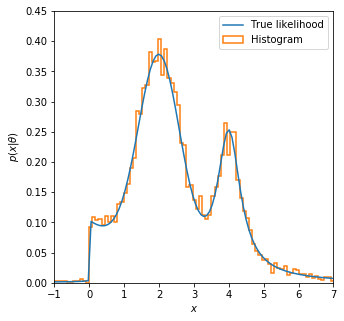

In [6]:
fig = plt.figure(figsize=(5,5))

plt.plot(
    x_grid.numpy().flatten(),
    np.exp(log_p.numpy().flatten()),
    label="True likelihood",
    lw=1.5
)

plt.hist(x.data.flatten(), range=(-1.,8.), bins=100, histtype="step", lw=1.5, density=True, label="Histogram")

plt.legend()

plt.xlim(-1.,7.)
plt.ylim(0., 0.45)

plt.xlabel("$x$")
plt.ylabel(r"$p(x | \theta)$")

plt.show()

## Trace info

In [7]:
theta.requires_grad = True
trace = sim.trace(theta)

In [8]:
theta_ref = torch.tensor([0.5, 0.3, 0.2, 2.,0.6, 4., 0.4, 0.5])

calculate_joint_score(trace, theta)

RuntimeError: One of the differentiated Tensors appears to not have been used in the graph. Set allow_unused=True if this is the desired behavior.